In [35]:
import numpy, os
from scipy.stats import mode
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.layers import Input, Dense, Conv2D, UpSampling2D, Conv2DTranspose, Flatten, MaxPooling2D
from helpers import loadData

In [2]:
X,y = loadData('train')
print(X[0].shape)

(32, 32, 3)


(32, 32, 1)
(63000, 1)


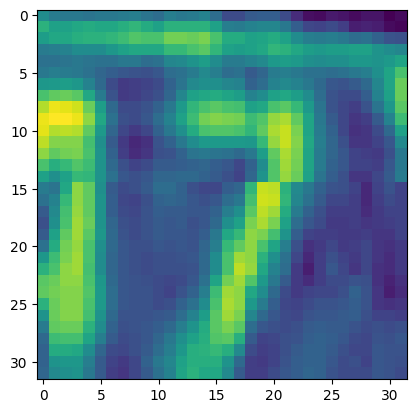

In [87]:
n = len(X)
color0 = []
color1 = []
color2 = []
for c, img in enumerate(X):
    im = numpy.array(img[:,:,0])
    color0.append(im.reshape(32,32,1))
    #color0.append(img[:,:,0])
    im = numpy.array(img[:,:,1])
    #color1.append(im.reshape(32,32,1))
    color1.append(img[:,:,1])
    im = numpy.array(img[:,:,2])
    #color2.append(im.reshape(32,32,1))
    color2.append(img[:,:,2])
#y = y.reshape(n, -1)
ytr = y[:63000]
yva = y[63000:]
color0tr = numpy.array(color0[:63000])
color0va = numpy.array(color0[63000:])
color1tr = numpy.array(color1[:63000])
color1va = numpy.array(color1[63000:])
color2tr = numpy.array(color2[:63000])
color2va = numpy.array(color2[63000:])
print(color0[0].shape)
print(ytr.shape)
plt.imshow(color2va[0])

In [139]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same' )(inp)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(2,2), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)
mod0 = Model(inp, x)
mod0.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod0.summary()

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_168 (Conv2D)         (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_168 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_169 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_170 (Conv2D)         (None, 8, 8, 32)          412

In [151]:
mod0.fit(color0tr, ytr, epochs=50, batch_size=64, shuffle=True, validation_data=(color0va, yva))

Epoch 1/2
985/985 [==============================] - 22s 23ms/step - loss: 0.3008 - accuracy: 0.9112 - val_loss: 0.4096 - val_accuracy: 0.8845
Epoch 2/2
985/985 [==============================] - 22s 22ms/step - loss: 0.2960 - accuracy: 0.9119 - val_loss: 0.4141 - val_accuracy: 0.8845


In [141]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same' )(inp)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(2,2), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)
mod1 = Model(inp, x)
mod1.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod1.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_171 (Conv2D)         (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_171 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_172 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_172 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_173 (Conv2D)         (None, 8, 8, 32)          412

In [152]:
mod1.fit(color1tr, ytr, epochs=50, batch_size=128, shuffle=True, validation_data=(color1va, yva))

Epoch 1/2
493/493 [==============================] - 18s 37ms/step - loss: 0.2840 - accuracy: 0.9160 - val_loss: 0.4128 - val_accuracy: 0.8838
Epoch 2/2
493/493 [==============================] - 18s 37ms/step - loss: 0.2806 - accuracy: 0.9183 - val_loss: 0.3977 - val_accuracy: 0.8923


1/1 [==============================] - 0s 35ms/step
[[0.05319478 0.05366424 0.05880267 0.12469784 0.0047412  0.13013753
  0.1112533  0.34895012 0.07895081 0.03560752]
 [0.04705956 0.06312692 0.30116487 0.11481271 0.13993277 0.03197859
  0.12784082 0.01537053 0.11368069 0.04503252]
 [0.00672858 0.00720899 0.2301947  0.18993726 0.1616593  0.13358356
  0.0605554  0.00191609 0.07800082 0.13021536]
 [0.00862086 0.0017248  0.06568209 0.24393085 0.01442306 0.3650047
  0.06938033 0.01972611 0.08534376 0.1261634 ]
 [0.02056524 0.00454165 0.24846153 0.16814639 0.0298093  0.11893893
  0.13045195 0.02028242 0.16955931 0.08924319]]


In [144]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same' )(inp)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 32, kernel_size=(2,2), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax')(x)
mod2 = Model(inp, x)
mod2.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod2.summary()

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_174 (Conv2D)         (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_174 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_175 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_175 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_176 (Conv2D)         (None, 8, 8, 32)          412

In [153]:
mod2.fit(color2tr, ytr, epochs=50, batch_size=128, shuffle=True, validation_data=(color2va, yva))

493/493 [==============================] - 18s 37ms/step - loss: 0.3103 - accuracy: 0.9074 - val_loss: 0.4526 - val_accuracy: 0.8723


In [147]:
def combine(col0,col1,col2):
    ret = []
    for c0,c1,c2 in zip(col0,col1,col2):
        m = mode([numpy.argmax(c0),numpy.argmax(c1),numpy.argmax(c2)],nan_policy='omit')
        ret.append(m.mode)
    return ret

In [148]:
col0pred = mod0.predict(color0va)
col1pred = mod1.predict(color1va)
col2pred = mod2.predict(color2va)
predictions = combine(col0pred, col1pred, col2pred)

321/321 [==============================] - 2s 6ms/step


/var/folders/17/cl3qd1ms5475fb4b0byw770m0000gn/T/ipykernel_38050/580272596.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m = mode([numpy.argmax(c0),numpy.argmax(c1),numpy.argmax(c2)],nan_policy='omit')


In [149]:
def calculateAccuracy(pred, lab):
    if len(pred)!=len(lab):
        print(f"Wrong dimentions: {len(pred)}!={len(lab)}")
        return
    else:
        n = len(pred)
        sm = sum([1 if pred[i]==lab[i] else 0 for i in range(n) ])
        return sm/n


In [154]:
#accuracy score
print(f"accuracy: {calculateAccuracy(predictions, yva)}")

accuracy: 0.8999707516817783
